In [0]:
#This is a Databrics Notebook where we can load the data in s3 bucket and use python,scala,sql langauages

In [0]:
# Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the best defense tools againinst different network attacks.

# There are differnt types of network attack such as DOS HULK,Dos GoldenEye,DoS slowloris, DoS Slowhttptest thee are clustered into two tyes of attacks naming  BENIGN(Normal),DoS(Attack) and in this we have theree differnt types of network data such as Packet info,Payload info,session info.

#Here in this project we are building a ML model which can detect network attacks 


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import pandas as pd
import seaborn as sns
import re
import time
import numpy as np

In [0]:
# File location and type
file_location = "/FileStore/tables/Intrusion_Train.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
train = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(train)

ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1420155,37,46,2634,7062,408,0,71.18918919,103.5271939,976,0,153.5217391,306.2118177,6827.423767,58.44432474,17318.96341,106106.5636,953414,0,1420155,39448.75,168205.1812,995622,3,466571,10368.24444,23078.02737,106355,1,0,0,0,0,764,944,26.05349416,32.39083058,0,976,115.42857140000001,239.42165690000002,57322.729779999994,0,0,0,1,0,0,0,0,1,116.8192771,71.18918919,153.5217391,764,0,0,0,0,0,0,37,2634,46,7062,8192,245,35,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,80,63122325,7,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.110895788,1.05E7,1.19E7,32100000,998805,63100000,1.05E7,1.19E7,32100000,998805,0,0.0,0.0,0,0,0,0,0,0,280,0,0.11089578800000001,0.0,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,280,0,0,0,0,0,0,7,0,0,0,29200,-1,0,40,7010762.0,0.0,7010762,7010762,1.87E7,1.22E7,32100000,8015920,DoS Slowhttptest
2,80,85039076,6,6,347,11595,347,0,57.83333333,141.66215680000002,5792,0,1932.5,2181.008184,140.42955969999997,0.141111599,7730825.091,2.56E7,84900000,1,84900000,1.7E7,3.8E7,84900000,1,153411,30682.2,60418.078,138145,45,0,0,0,0,200,200,0.0705558,0.0705558,0,5792,918.6153846000001,1716.139686,2945135.423,0,0,0,0,1,0,0,0,1,995.1666667000002,57.83333333,1932.5,200,0,0,0,0,0,0,6,347,6,11595,251,235,1,32,4.0,0.0,4,4,8.49E7,0.0,84900000,84900000,DoS Hulk
3,443,5379977,5,1,135,46,46,6,27.0,20.1246118,46,46,46.0,0.0,33.6432665,1.115246403,1075995.4,2342474.062,5266022,4,5379977,1344994.25,2614503.837,5266022,4,0,0.0,0.0,0,0,1,0,0,0,100,20,0.929372003,0.18587440100000002,6,46,32.42857143,18.86670032,355.952381,0,1,0,0,1,0,0,0,0,37.83333333,27.0,46.0,100,0,0,0,0,0,0,5,135,1,46,258,360,4,20,109172.0,0.0,109172,109172,5266022.0,0.0,5266022,5266022,BENIGN
4,80,84220258,8,5,326,11595,320,0,40.75,112.85357140000002,8688,0,2319.0,3774.237539,141.5455175,0.154357162,7018354.833,2.43E7,84100000,1,84100000,1.2E7,3.18E7,84100000,1,146592,36648.0,64691.87929,133266,190,0,0,0,0,252,168,0.094989023,0.059368139,0,8688,851.5,2382.9520399999997,5678460.4229999995,0,0,0,0,1,0,0,0,0,917.0,40.75,2319.0,252,0,0,0,0,0,0,8,326,5,11595,274,235,2,20,1976.0,0.0,1976,1976,8.41E7,0.0,84100000,84100000,DoS Hulk
5,389,90666666,24,12,4836,3792,403,0,201.5,205.8338291,316,316,316.0,0.0,95.16176541,0.397058826,2590476.171,8528097.813,40400000,0,90700000,3942028.957,1.03E7,40400000,2,90700000,8242397.909,1.4E7,40400000,2,1,0,0,0,768,384,0.264705884,0.132352942,0,403,244.08108109999998,175.2215072,30702.57658,0,1,0,0,1,0,0,0,0,250.86111110000002,201.5,316.0,768,0,0,0,0,0,0,24,4836,12,3792,955,257,11,32,18742.0,36808.698489999995,73955,282,2.26E7,1.48E7,40400000,8642788,BENIGN
6,53299,54,1,1,37,0,37,37,37.0,0.0,0,0,0.0,0.0,685185.1852,37037.03704,54.0,0.0,54,54,0,0.0,0.0,0,0,0,0.0,0.0,0,0,1,0,0,0

In [0]:
Train=train.toPandas()
print(Train.shape)
print(Train.columns)
print(Train.dtypes)

(129879, 80)
Index(['ID', 'Destination Port', 'Flow Duration', 'Total Fwd Packets',
 'Total Backward Packets', 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
 'Fwd Packet Length Std', 'Bwd Packet Length Max',
 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
 'Idle Std', 'Idle Max', 'Idle Min', 'Label'],
 dtype='object')
ID int32
Destination Port int32
Flow Duration int32
Total Fwd Packets int32
Total Backward Packets int32
Total Length of Fwd Packets int32
Total Length of Bwd Packets int32
Fwd Packet Length Max int32
Fwd Packet Length Min int32
Fwd Packet Length Mean float64
Fwd Packet Length Std float64
Bwd Packet Length Max int32
Bwd Packet Length Min int32
Bwd Packet Length Mean float64
Bwd Packet Length Std float64
Flow Bytes/s float64
Flow Packets/s float64
Flow IAT Mean float64
Flow IAT Std float64
Flow IAT Max int32
Flow IAT Min int32
Fwd IAT Total int32
Fwd IAT Mean float64
Fwd IAT Std float64
Fwd IAT Max int32
Fwd IAT Min int32
Bwd IAT Total int32
Bwd IAT Mean float64
Bwd IAT Std float64
Bwd IAT Max int32
Bwd IAT Min int32
Fwd PSH Flags int32
Bwd PSH Flags int32
Fwd URG Flags int32
Bwd URG Flags int32
Fwd Header Length int32
Bwd Header Length int32
Fwd Packets/s float64
Bwd Packets/s float64
Min Packet Length int32
Max Packet Length int32
Packet Length Mean float64
Packet Length Std float64
Packet Length Variance float64
FIN Flag Count int32
SYN Flag Count int32
RST Flag Count int32
PSH Flag Count int32
ACK Flag Count int32
URG Flag Count int32
CWE Flag Count int32
ECE Flag Count int32
Down/Up Ratio int32
Average Packet Size float64
Avg Fwd Segment Size float64
Avg Bwd Segment Size float64
Fwd Header Length.1 int32
Fwd Avg Bytes/Bulk int32
Fwd Avg Packets/Bulk int32
Fwd Avg Bulk Rate int32
Bwd Avg Bytes/Bulk int32
Bwd Avg Packets/Bulk int32
Bwd Avg Bulk Rate int32
Subflow Fwd Packets int32
Subflow Fwd Bytes int32
Subflow Bwd Packets int32
Subflow Bwd Bytes int32
Init_Win_bytes_forward int32
Init_Win_bytes_backward int32
act_data_pkt_fwd int32
min_seg_size_forward int32
Active Mean float64
Active Std float64
Active Max int32
Active Min int32
Idle Mean float64
Idle Std float64
Idle Max int32
Idle Min int32
Label object
dtype: object

In [0]:
def null_val_perc(inp_df):
    inp_df = inp_df.replace(to_replace='',value=np.nan)
    percent_missing = inp_df.isnull().sum() * 100 / len(inp_df)
    missing_value_df = pd.DataFrame({'column_name': inp_df.columns,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
#     missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
    return(missing_value_df.loc[missing_value_df['percent_missing']>0,:])

In [0]:
null_val_perc(Train)

Out[38]:

,column_name,percent_missing
Flow Bytes/s,Flow Bytes/s,0.153989


In [0]:
Train["Flow Bytes/s"]=Train["Flow Bytes/s"].fillna(0)

Out[40]:

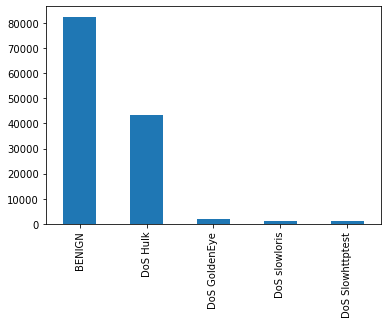

<matplotlib.axes._subplots.AxesSubplot at 0x7f26fc2e6ca0>

In [0]:

Train["Label"].value_counts().plot.bar()

In [0]:
Target_1=["DoS Slowhttptest","DoS Hulk","DoS GoldenEye","DoS slowloris"]
Train["Label"] = [1 if X in(Target_1) else 0 for X in Train["Label"]]

In [0]:
Train["Label"].value_counts()

Out[42]: 0 82428
1 47451
Name: Label, dtype: int64

In [0]:
Train=Train[Train.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
Train.dropna(axis=0,inplace=True)

In [0]:
integer_columns = list(Train.select_dtypes(include='int64').columns)
for i in integer_columns:
    Train[i].astype('float64')

In [0]:
Train['Label']=Train['Label'].astype('category')

In [0]:

Test = Train.sample(frac=0.3,random_state=200)
Test.reset_index()

Out[46]:

,index,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,109576,109576,80,85474097,6,5,360,11595,360,0,60.000000,146.969385,10136,0,2319.000000,4414.366206,139.866935,0.128694,8.547410e+06,2.700000e+07,85300000,1,85300000,17100000.00,3.810000e+07,85300000,1,185424,4.635600e+04,7.501501e+04,157139,83,0,0,0,0,200,168,0.070197,0.058497,0,10136,996.250000,2908.525904,8.459523e+06,0,0,0,0,1,0,0,0,0,1086.818182,60.000000,2319.000000,200,0,0,0,0,0,0,6,360,5,11595,251,235,1,32,6.0,0.0,6,6,85300000.0,0.0,85300000,85300000,1
1,63165,63165,443,5991956,9,6,385,6114,198,0,42.777778,70.490740,2930,0,1019.000000,1156.246859,1084.620782,2.503356,4.279969e+05,1.525522e+06,5725194,1,5991956,748994.50,2.012052e+06,5725194,1,48775,9.755000e+03,1.272373e+04,26900,51,0,0,0,0,192,132,1.502014,1.001342,0,2930,406.187500,829.903948,6.887406e+05,0,0,0,1,0,0,0,0,0,433.266667,42.777778,1019.000000,192,0,0,0,0,0,0,9,385,6,6114,8192,30,8,20,266761.0,0.0,266761,266761,5725194.0,0.0,5725194,5725194,0
2,25621,25621,80,18515334,9,6,351,11632,351,0,39.000000,117.000000,4392,0,1938.666667,2190.718847,647.193294,0.810139,1.322524e+06,3.487285e+06,12500000,15,13500000,1689441.50,4.387905e+06,12500000,220,17500000,3.503262e+06,5.482704e+06,12500000,15,0,0,0,0,304,200,0.486084,0.324056,0,4392,748.937500,1585.254952,2.513033e+06,0,0,0,1,0,0,0,0,0,798.866667,39.000000,1938.666667,304,0,0,0,0,0,0,9,351,6,11632,29200,235,1,32,1000011.0,0.0,1000011,1000011,12500000.0,0.0,12500000,12500000,1
3,7591,7591,123,85835,1,1,48,48,48,48,48.000000,0.000000,48,48,48.000000,0.000000,1118.424885,23.300518,8.583500e+04,0.000000e+00,85835,85835,0,0.00,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,32,20,11.650259,11.650259,48,48,48.000000,0.000000,0.000000e+00,0,0,0,0,0,0,0,0,1,72.000000,48.000000,48.000000,32,0,0,0,0,0,0,1,48,1,48,-1,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,71018,71018,43189,70,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,28571.428570,7.000000e+01,0.000000e+00,70,70,0,0.00,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,32,32,14285.714290,14285.714290,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,972,284,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38879,25607,25607,443,91040979,26,36,2110,61048,805,0,81.153846,216.929056,4380,0,1695.777778,846.967198,693.731556,0.681012,1.492475e+06,1.160000e+07,90500000,0,91000000,3641639.16,1.81000

In [0]:
Train=Train.drop(columns=['ID'])

In [0]:
X=Train.drop(columns='Label')
Y=Train.loc[:,'Label']
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Temporary=X.copy()


In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y,random_state=1)
null_val_perc(X_train)

Out[49]:

,column_name,percent_missing


In [0]:
import statistics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import os
import tempfile
import numpy as np

class Utils:

    @staticmethod
    def load_data(path):
        """
        Read a CSV file from a given path and return a Pandas DataFrame
        :param path: path to csv file
        :return: returns Pandas DataFrame
        """

        df = pd.read_csv(path)
        return df

    @staticmethod
    def plot_graphs(x_data, y_data, x_label, y_label, title):
        """
        Use the Mathplot lib to plot data points provide and respective x-axis and y-axis labels
        :param x_data: Data for x-axis
        :param y_data: Data for y-axis
        :param x_label: Label for x-axis
        :param y_label: Label FOR Y-axis
        :param title: Title for the plot
        :return: return tuple (fig, ax)
        """

        plt.clf()

        fig, ax = plt.subplots()
        ax.plot(x_data, y_data)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(title)

        return (fig, ax)

    @staticmethod
    def plot_residual_graphs(predictions, y_test, x_label, y_label, title):
        """
        Create residual plot using seaborn plotting library
        https://seaborn.pydata.org/tutorial/regression.html
        :param predictions: predictions from the run
        :param y_test: actual labels
        :param x_label: name for the x-axis
        :param y_label: name for the y-axis
        :param title:  title for the plot
        :return: tuple of plt, fig, ax
        """

        fig, ax = plt.subplots()

        sns.residplot(predictions, y_test, lowess=True)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)

        return (plt, fig, ax)

    @staticmethod
    def get_mlflow_directory_path(*paths, create_dir=True):
        """
        Get the current running path where mlruns is created. This is the directory from which
        the python file containing MLflow code is executed. This method is used for artifacts, such
        as images, where we want to store plots.
        :param paths: list of directories below mlfruns, experimentID, mlflow_run_id
        :param create_dir: detfault is True
        :return: path to directory.
        """

        cwd = os.getcwd()
        dir = os.path.join(cwd, "mlruns", *paths)
        if create_dir:
            if not os.path.exists(dir):
                os.mkdir(dir, mode=0o755)
        return dir

    @staticmethod
    def get_temporary_directory_path(prefix, suffix):
        """
        Get a temporary directory and files for artifacts
        :param prefix: name of the file
        :param suffix: .csv, .txt, .png etc
        :return: object to tempfile.
        """

        temp = tempfile.NamedTemporaryFile(prefix=prefix, suffix=suffix)
        return temp

    @staticmethod
    def print_pandas_dataset(d):
        """
        Given a Pandas dataFrame show the dimensions sizes
        :param d: Pandas dataFrame
        :return: None
        """
        print("rows = %d; columns=%d" % (d.shape[0], d.shape[1]))
        print(d.head())

    @staticmethod
    def plot_confusion_matrix(y_true, y_pred, classes,
                              normalize=False,
                              title=None,
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Borrowed from the scikit-learn library documentation

        :param y_true: the actual value of y
        :param y_pred: the predicted valuye of y
        :param classes: list of label classes to be predicted
        :param normalize: normalize the data
        :param title: title of the plot for confusion matrix
        :param cmap: color of plot
        :return: returns a tuple of (plt, fig, ax)
        """

        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
        classes = classes[unique_labels(y_true, y_pred)]
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        print(cm)

        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return (plt, fig, ax)

    @staticmethod 
    def rmse(y_true, y_pred):
      """
      Use only for Keras models
      """
      from keras import backend
      return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                              normalize=False,
                              title=None,
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Borrowed from the scikit-learn library documentation

        :param y_true: the actual value of y
        :param y_pred: the predicted valuye of y
        :param classes: list of label classes to be predicted
        :param normalize: normalize the data
        :param title: title of the plot for confusion matrix
        :param cmap: color of plot
        :return: returns a tuple of (plt, fig, ax)
        """

        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
        classes = classes[unique_labels(y_true, y_pred)]
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        print(cm)

        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return (plt, fig, ax)

In [0]:
 def get_temporary_directory_path(prefix, suffix):
        """
        Get a temporary directory and files for artifacts
        :param prefix: name of the file
        :param suffix: .csv, .txt, .png etc
        :return: object to tempfile.
        """

        temp = tempfile.NamedTemporaryFile(prefix=prefix, suffix=suffix)
        return temp

In [0]:
def model_evaluation(model,train_x,train_y,test_x,test_y):
    #Evaluated_values={}
              cnt=0
              r_name="RF Intrusion Detection Classification"
              with mlflow.start_run(run_name=r_name) as run:
#                       for i in models:
                  #         with mlflow.start_run(run_name=r_name) as run:
                            #Fitting train values to model:
                            # get current run and experiment id
                            runID = run.info.run_uuid
                            experimentID = run.info.experiment_id
                            model.fit(train_x,train_y)

                              #Predicting values for train and test:
                            pred_train=model.predict(train_x)
                            pred_test=model.predict(test_x)

                              #Calculating error metrics in train and test data:
                              ##################################################

                              #For Train:
                            cm_train=confusion_matrix(train_y,pred_train)
                            class_report_train=classification_report(train_y,pred_train)
                            prec_train=precision_score(train_y,pred_train)
                            f1_train=f1_score(train_y,pred_train)
                            accu_train=accuracy_score(train_y,pred_train)
                            recall_train=recall_score(train_y,pred_train)

                              #For Test:
                            cm_test=confusion_matrix(test_y,pred_test)
                            class_report_test=classification_report(test_y,pred_test)
                            prec_test=precision_score(test_y,pred_test)
                            f1_test=f1_score(test_y,pred_test)
                            accu_test=accuracy_score(test_y,pred_test)
                            recall_test=recall_score(test_y,pred_test)

                              #Printing model details and error values:
                            mlflow.sklearn.log_model(model, "random-forest-class-model")
                            print('\n\t\t\t\t Model %.0f '%(cnt+1))
                            print('----------------------------------------------------------------------------')
                            print(r_name,'\n\n')
                            print('Train values : ')
                            print('-------------- \n')
                            print('Precision score  : ',prec_train,'\n')
                            mlflow.log_metric("Precision", prec_train)
                            print('F1-score         : ',f1_train,'\n')
                            mlflow.log_metric("F1-score", f1_train)
                            print('Accuracy score   : ',accu_train,'\n')
                            mlflow.log_metric("Accuracy_Train", accu_train)
                            print('Recall score     : ',recall_train,'\n')
                            print('Confusion matrix : \n')
                            print(cm_train,'\n')
                            print('Classification report : \n ')
                            print(class_report_train,'\n')
                            (plt, fig, ax) = plot_confusion_matrix(test_y, pred_test, test_y, title="Intrusion Classs Classification Confusion Matrix")

                            print('Valid values : ')
                            print('------------- \n')
                            print('Precision score  : ',prec_test,'\n')
                            print('F1-score         : ',f1_test,'\n')
                            print('Accuracy score   : ',accu_test,'\n')
                            print('Recall score     : ',recall_test,'\n')
                            print('Confusion matrix :  \n')
                            print(cm_test,'\n')
                            print('Classification report : \n')
                            print(class_report_test,'\n')

                            cnt+=1
                            temp_file_name = get_temporary_directory_path("confusion_matrix-", ".png")
                            temp_name = temp_file_name.name
                            try:
                                fig.savefig(temp_name)
                                mlflow.log_artifact(temp_name, "confusion_matrix_plots")
                            finally:
                                    temp_file_name.close()  # Delete the temp file

                              # print some data
                            print("-" * 100)
                            print("Inside MLflow Run with run_id {} and experiment_id {}".format(runID, experimentID))
                  #                print(conf_matrix)
                  #                print(classification_report(y_test,y_pred))
                  #                print("Accuracy Score:", accu_train)

                            return (experimentID, runID,model)
                          #return Evaluated_values


In [0]:
import mlflow

Model 1 
----------------------------------------------------------------------------
RF Intrusion Detection Classification 


Train values : 
-------------- 

Precision score : 0.9558259953778194 

F1-score : 0.9714277219480287 

Accuracy score : 0.9788158010757428 

Recall score : 0.9875472268399577 

Confusion matrix : 

[[56133 1510]
 [ 412 32673]] 

Classification report : 
 
 precision recall f1-score support

 0 0.99 0.97 0.98 57643
 1 0.96 0.99 0.97 33085

 accuracy 0.98 90728
 macro avg 0.97 0.98 0.98 90728
weighted avg 0.98 0.98 0.98 90728
 

Confusion matrix, without normalization
[[23997 707]
 [ 173 14007]]
Valid values : 
------------- 

Precision score : 0.9519505233111323 

F1-score : 0.9695438499342425 

Accuracy score : 0.977368583479066 

Recall score : 0.9877997179125529 

Confusion matrix : 

[[23997 707]
 [ 173 14007]] 

Classification report : 

 precision recall f1-score support

 0 0.99 0.97 0.98 24704
 1 0.95 0.99 0.97 14180

 accuracy 0.98 38884
 macro avg 0.97 0.98 0.98 38884
weighted avg 0.98 0.98 0.98 38884
 

----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id c0ce4bb5f12e4e5ea3c0ac58586f9ed8 and experiment_id 3090201011611048

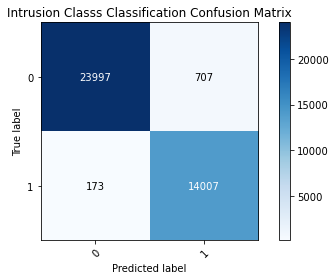

In [0]:
random_forest = RandomForestClassifier(n_jobs=-1,max_features='sqrt',max_depth= 5, min_samples_leaf=2, n_estimators=18,class_weight='balanced',random_state=123)
Eid,Runid,model=model_evaluation(random_forest,X_train,Y_train,X_test,Y_test)

In [0]:
Test=Test.drop(columns=['ID'])
X_test=Test.drop(columns='Label')
Y_test=Test.loc[:,'Label']
scaler = StandardScaler()
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
null_val_perc(X_test)

Out[56]:

,column_name,percent_missing


In [0]:

logged_model = 'runs:/'+Runid+'/random-forest-class-model'


# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
pred=loaded_model.predict(pd.DataFrame(X_test))

Confusion matrix, without normalization
[[24565 139]
 [ 6893 7287]]

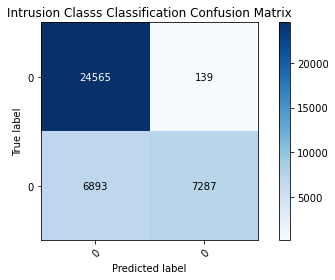

In [0]:
(plt, fig, ax) = plot_confusion_matrix(Y_test,pred,pred,title="Intrusion Classs Classification Confusion Matrix")